<a href="https://colab.research.google.com/github/Penpitcha0634/BSC_DPDM23/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preparation

In [67]:
import pandas as pd
import numpy as np

## Metadata

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


In [68]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8',
            'a9','a10','a11','a12','a13','a14','a15','a16']

In [69]:
credit = pd.read_csv('/content/drive/MyDrive/BSC_DPDM23/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column names in the data file

print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [70]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [71]:
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,t,t,1,f,g,0,+
1,4.460,3.04,t,t,6,f,g,560,+
2,0.500,1.50,t,f,0,f,g,824,+
3,1.540,3.75,t,t,5,t,g,3,+
4,5.625,1.71,t,f,0,f,s,0,+
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,f,f,0,f,g,0,-
686,0.750,2.00,f,t,2,t,g,394,-
687,13.500,2.00,f,t,1,t,g,1,-
688,0.205,0.04,f,f,0,f,g,750,-


In [72]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

Preprocessing

In [73]:
credit = credit.replace({'t':1,'f':0,'g':1, 'p':2, 's':3,'+':1,'-':0})

In [74]:
credit= credit[['a9','a10','a12','a13','a16']] #ไม่เอาค่า continuous.

In [75]:
credit

,a9,a10,a12,a13,a16
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1
3,1,1,1,1,1
4,1,0,0,3,1
...,...,...,...,...,...
685,0,0,0,1,0
686,0,1,1,1,0
687,0,1,1,1,0
688,0,0,0,1,0


## divide data into train and test


In [76]:
import numpy as np

In [77]:
np.random.seed(seed=1)

In [78]:
a = np.random.randint(2, size=len(credit))

In [79]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [80]:
train = credit[a == 1] # ข้อมูล ฝึก
train.shape

(324, 5)

In [81]:
test = credit[a == 0] # ข้อสอบ
test.shape

(366, 5)

## Start Decision Tree

### import

In [82]:
from sklearn.tree import DecisionTreeClassifier

### define

In [83]:
Dtree1 = DecisionTreeClassifier(random_state=0)

### train

In [84]:
X_train = train.iloc[:,:-1]

In [85]:
y_train = train.iloc[:,-1]

In [86]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [87]:
from sklearn import tree

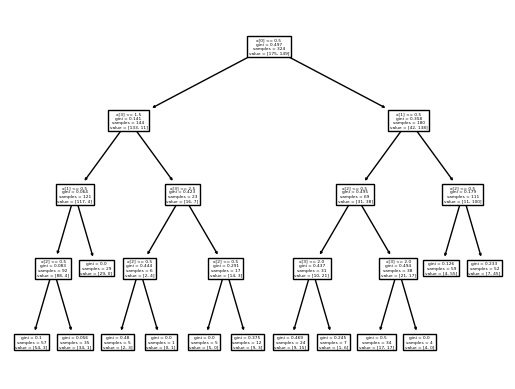

In [88]:
tree.plot_tree(Dtree1);

### test

In [89]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [90]:
y_predict = Dtree1.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
y_test

2      1
3      1
9      1
10     1
12     1
      ..
685    0
686    0
687    0
688    0
689    0
Name: a16, Length: 366, dtype: int64

In [93]:
accuracy_score(y_test, y_predict)

0.8387978142076503

In [94]:
y_predict

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Set parameter

### Import

In [95]:
from sklearn.tree import DecisionTreeClassifier

### Define

In [96]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=2)#max_depth=ชั้นต้นไม้

### Train

In [97]:
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

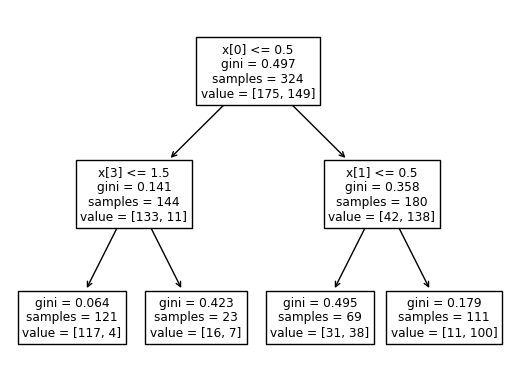

In [98]:
tree.plot_tree(Dtree2);

### Test

In [99]:
y_predict2 = Dtree2.predict(X_test)

In [100]:
accuracy_score(y_test, y_predict2)

0.8715846994535519

#HW3
ให้เเต่ละกลุ่ม สร้างต้นไม้ของตัวเอง โดยปรับเปลี่ยน parameters ให้เเละมาอธิบาย parameter ของตัวเอง ว่ามันคืออะไร
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* เเถว 1 : criterion,max_leaf_nodes
* เเถว 2 : min_samples_split,splitter
* เเถว 3 : min_samples_leaf,max_features
* เเถว 4 : min_impurity_decrease
* เเถว 5 : min_weight_fraction_leaf

##เเถว 2 : min_samples_split,splitte

### min_samples_split (จะแบ่งเป็น decision node ก็ต่อเมื่อจำนวนของกลุ่มตัวอย่างมากกว่า หรือเท่ากับค่าที่กำหนดใน min samples split แต่ถ้าจำนวนของกลุ่มตัวอย่างน้อยกว่าค่าที่กำหนดจะไม่แบ่ง Decision node )

In [101]:
DtreeHW2 = DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_split=323)

In [102]:
DtreeHW2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=323, random_state=0)

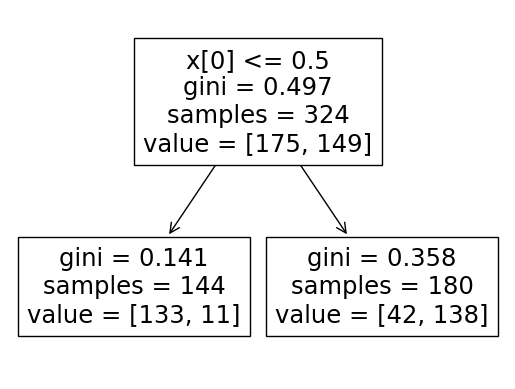

In [103]:
tree.plot_tree(DtreeHW2);

In [104]:
y_predictHW2 = DtreeHW2.predict(X_test)

In [105]:
accuracy_score(y_test, y_predictHW2) #หาความน่าเชื่อถือ

0.8715846994535519

### splitte

In [106]:
DtreeHW2_1 = DecisionTreeClassifier(random_state=0,max_depth=2,splitter="random")

In [107]:
DtreeHW2_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0, splitter='random')

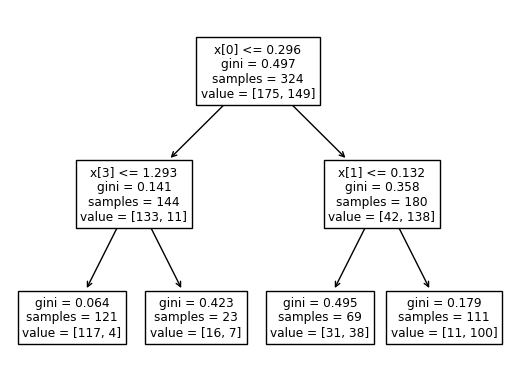

In [108]:
tree.plot_tree(DtreeHW2_1);

In [109]:
y_predictHW2_1 = DtreeHW2_1.predict(X_test)

In [110]:
accuracy_score(y_test, y_predictHW2_1) #ทำนายค่าความน่าเชื่อถือ

0.8715846994535519

### compare

In [111]:
DtreeHW2_1 = DecisionTreeClassifier(random_state=0,max_depth=2,splitter="best")

In [112]:
DtreeHW2_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

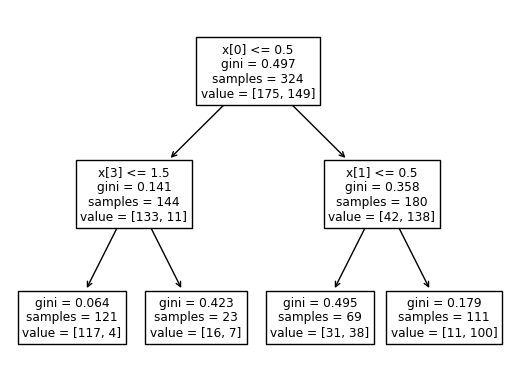

In [113]:
tree.plot_tree(DtreeHW2_1);

In [114]:
y_predictHW2_1 = DtreeHW2_1.predict(X_test)

In [115]:
accuracy_score(y_test, y_predictHW2_1)

0.8715846994535519

#HW5 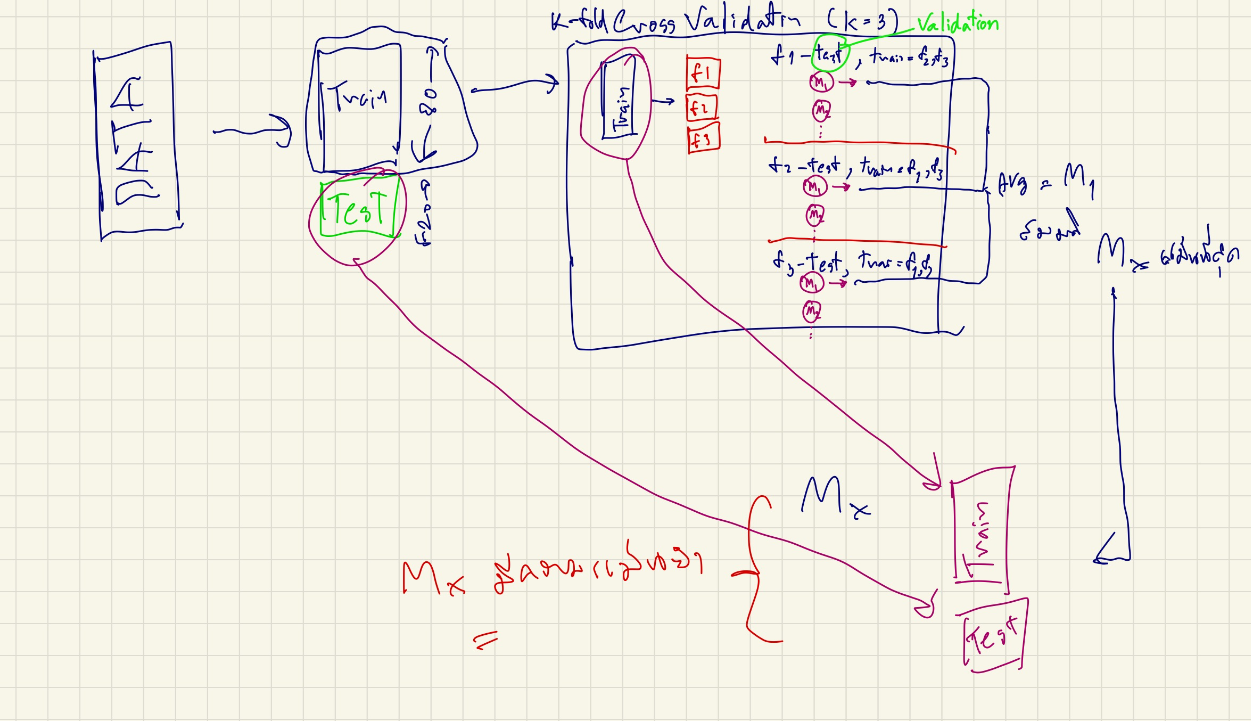

##ขั้นตอนนี้ เราจะทำกับทุก Model เพื่อที่จะหาโมเดลที่ดีที่สุด

## Model selection
เลือกโมเดลที่ดีที่สุดโดยเลือกจากต้นไม้ที่มี parameters: dept, criterion และ Naive Bayes และรายงานผลการคาดการณ์สำหรับนำไปทำนายในอนาคต

In [116]:
credit #ดูหน้าตา data ก่อน

,a9,a10,a12,a13,a16
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1
3,1,1,1,1,1
4,1,0,0,3,1
...,...,...,...,...,...
685,0,0,0,1,0
686,0,1,1,1,0
687,0,1,1,1,0
688,0,0,0,1,0


###train_test_split

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_credit = credit.iloc[:,:-1]
y_credit = credit.iloc[:,-1]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(x_credit, y_credit, test_size=0.33, random_state=6) #input is x and y

### split data into 3 folds

In [120]:
from sklearn.model_selection import KFold

In [121]:
kf = KFold(n_splits=3, shuffle=True, random_state=6)

In [122]:
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f" Train: index={train_index}")
    print(f" Test:  index={test_index}")

Fold 0:
 Train: index=[  0   1   2   3   5   6   7   8   9  11  14  15  18  20  21  22  23  24
  25  26  29  31  33  34  35  36  37  38  39  40  41  42  43  45  47  49
  50  51  52  55  57  58  60  62  63  64  65  67  68  70  73  74  75  76
  77  78  80  82  83  84  85  86  87  88  89  91  92  94  96  97  99 100
 101 102 104 105 106 107 108 110 111 114 118 119 120 121 123 124 125 126
 127 129 130 131 132 133 135 136 139 141 142 144 145 146 147 149 150 151
 152 153 157 159 160 161 164 165 167 168 169 170 172 173 174 176 178 180
 181 184 185 186 187 190 191 193 194 195 196 197 198 201 202 204 206 208
 211 213 214 216 218 219 220 225 226 227 228 233 234 235 236 237 238 240
 241 242 243 245 246 250 251 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 270 271 272 274 276 278 279 281 284 286 287 289 290 291
 295 296 298 300 301 302 303 304 306 309 313 314 316 317 318 319 321 322
 323 324 325 326 328 331 332 333 334 335 336 337 338 339 340 341 342 346
 347 350 353 355 358 361 362 

In [125]:
from sklearn.naive_bayes import GaussianNB

### train 4 decision tree models and 1 Native Bayes

In [126]:
results = []
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    result_f = {}
    #DT depth 3, cri gini
    Dtree1 = DecisionTreeClassifier(random_state=6,max_depth=3,criterion='gini') #define
    Dtree1.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    prediction1 = Dtree1.predict(np.array(X_train)[test_index]) #predict
    acc1 = accuracy_score(np.array(y_train)[test_index], prediction1) #evaluate
    result_f['dt1'] = acc1

    #DT depth 5, cri gini
    Dtree2 = DecisionTreeClassifier(random_state=6,max_depth=5,criterion='gini')
    Dtree2.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    prediction2 = Dtree2.predict(np.array(X_train)[test_index]) #predict
    acc2 = accuracy_score(np.array(y_train)[test_index], prediction2) #evaluate
    result_f['dt2'] = acc2

    #DT depth 3, cri gain
    Dtree3 = DecisionTreeClassifier(random_state=6,max_depth=3,criterion='entropy')
    Dtree3.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    prediction3 = Dtree3.predict(np.array(X_train)[test_index]) #predict
    acc3 = accuracy_score(np.array(y_train)[test_index], prediction3) #evaluate
    result_f['dt3'] = acc3

    #DT depth 5, cri gain
    Dtree4 = DecisionTreeClassifier(random_state=6,max_depth=5,criterion='entropy')
    Dtree4.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    prediction4 = Dtree4.predict(np.array(X_train)[test_index]) #predict
    acc4 = accuracy_score(np.array(y_train)[test_index], prediction4) #evaluate
    result_f['dt4'] = acc4

    #Naïve Bayes
    gnb = GaussianNB()
    gnb.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    predictionN = gnb.predict(np.array(X_train)[test_index]) #predict
    accN = accuracy_score(np.array(y_train)[test_index], predictionN) #evaluate
    result_f['NB'] = accN

    results.append(result_f)

In [127]:
results

[{'dt1': 0.8246753246753247,
  'dt2': 0.8246753246753247,
  'dt3': 0.8246753246753247,
  'dt4': 0.8246753246753247,
  'NB': 0.8831168831168831},
 {'dt1': 0.8311688311688312,
  'dt2': 0.8311688311688312,
  'dt3': 0.8311688311688312,
  'dt4': 0.8311688311688312,
  'NB': 0.8311688311688312},
 {'dt1': 0.8246753246753247,
  'dt2': 0.8051948051948052,
  'dt3': 0.8246753246753247,
  'dt4': 0.8051948051948052,
  'NB': 0.8441558441558441}]

### find the best model from 3-fold cross validation

In [128]:
print(f"averaged acc DT1 = {(results[0]['dt1']+results[1]['dt1']+results[2]['dt1'])/3}")
print(f"averaged acc DT2 = {(results[0]['dt2']+results[1]['dt2']+results[2]['dt2'])/3}")
print(f"averaged acc DT3 = {(results[0]['dt3']+results[1]['dt3']+results[2]['dt3'])/3}")
print(f"averaged acc DT4 = {(results[0]['dt4']+results[1]['dt4']+results[2]['dt4'])/3}")
print(f"averaged acc NB = {(results[0]['NB']+results[1]['NB']+results[2]['NB'])/3}")

averaged acc DT1 = 0.8268398268398268
averaged acc DT2 = 0.8203463203463204
averaged acc DT3 = 0.8268398268398268
averaged acc DT4 = 0.8203463203463204
averaged acc NB = 0.8528138528138528


###evaluate on test

In [129]:
gnb = GaussianNB() #define
gnb.fit(np.array(X_train),np.array(y_train))   #train
prediction_test = gnb.predict(np.array(X_test)) #predict
accTest = accuracy_score(np.array(y_test), prediction_test) #evaluate

print(f'model Naïve Bayes จะมี Accuracy เมื่อไปใช้งานจริงประมาณ {accTest}')

model Naïve Bayes จะมี Accuracy เมื่อไปใช้งานจริงประมาณ 0.8508771929824561


### จบแล้วขั้นตอนที่เราต้องทำในทุกๆโมเดล